## example : binning

In [14]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins,x)
np.add.at(counts, i ,1)

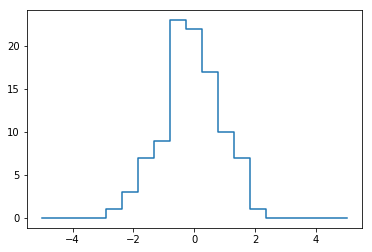

In [16]:
plt.plot(bins, counts, linestyle='steps')

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

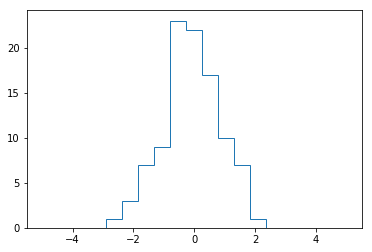

In [22]:
plt.hist(x, bins, histtype='step')

In [23]:
print('numpy routine:')
%timeit counts, edges = np.histogram(x, bins)
print('custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins,x), 1)

numpy routine:
18.3 µs ± 749 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
custom routine:
10.4 µs ± 264 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
x = np.random.randn(1000000)
print('numpy routine:')
%timeit counts, edges = np.histogram(x, bins)
print('custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x),1)

numpy routine:
48.3 ms ± 95.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
custom routine:
79.1 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## sorting

In [26]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [27]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 4, 3, 5])

In [36]:
def bogosort(x):
    while np.any(x[:-1]>(x[1:])):
        np.random.shuffle(x)
    return x

In [37]:
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [57]:
## np.sort  : to sort values
## np.argsort : to return sorted indeces


In [39]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [50]:
y = np.array([2,1,5,3,4])

In [56]:
y.sort()
print(y)

[1 2 3 4 5]


In [58]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [59]:
x[i]

array([1, 2, 3, 4, 5])

In [61]:
rand = np.random.RandomState(42)
x = rand.randint(0,10, (4, 6))
print(x)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [63]:
np.sort(x, axis=0)  

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [64]:
np.sort(x, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [65]:
## np.partition - separate arrary with given rank


In [70]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)
## x[:3] smallest 3 
## x[3:] last

array([2, 1, 3, 4, 6, 5, 7])

In [69]:
rand = np.random.RandomState(42)
x = rand.randint(0,10, (4, 6))
np.partition(x, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [71]:
x = rand.rand(10,2)

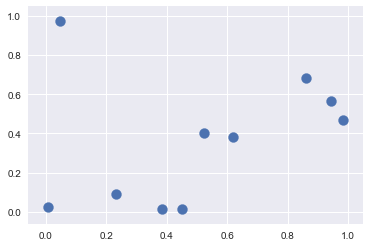

In [72]:
%matplotlib inline
import seaborn; seaborn.set()
plt.scatter(x[:,0],x[:,1], s=100)

In [74]:
dist_sq = np.sum(x[:,np.newaxis,:] - x[np.newaxis,:,:]**2, axis=1)

In [89]:
differences = x[:, np.newaxis, :] - x[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [91]:
sq_differences = differences**2
sq_differences.shape

(10, 10, 2)

In [93]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [94]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [97]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [99]:
k=2
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)
print(nearest_partition)

[[3 0 9 7 1 4 2 5 8 6]
 [1 4 7 9 3 5 6 2 8 0]
 [2 1 4 6 3 0 5 7 8 9]
 [3 9 7 0 1 5 6 2 8 4]
 [1 8 4 5 7 6 9 3 2 0]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 5 6 2 8 0]
 [8 5 6 4 1 7 9 3 2 0]
 [3 9 7 0 1 5 6 2 8 4]]


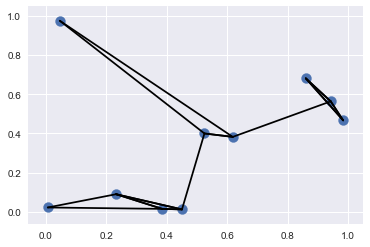

In [101]:
plt.scatter(x[:,0], x[:,1], s=100)
k=2
for i in range(x.shape[0]):
    for j in nearest_partition[i, : k+1]:
        plt.plot(*zip(x[j], x[i]), color='black')

In [122]:
names = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]


In [123]:
data = np.empty(4, dtype= {'names':('name', 'age', 'weight'), 'formats':('U10','i4','f8')})

In [124]:
data['name'] = names
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [126]:
data[data['age']<30]['name']

array(['Alice', 'Doug'], dtype='<U10')